# 2018-02-13 Econ 101b Problem Set 6—DRAFT ANSWERS

## Problem set will be due Wed Feb 28 at midnight...

#### Sections between Tu AM & Th AM lecture will be problem set section...

----

&nbsp;

## Setting up the Python/Jupyter environment

In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

In [2]:
# ABOVE CELL IS "NO SCROLLING SUBWINDOWS" SETUP
#
# keep output cells from shifting to autoscroll: little scrolling
# subwindows within the notebook are an annoyance...

In [3]:
# THIS CELL LOADS THE LIBRARIES
#
# set up the environment by reading in every library we might need: 
# os... graphics... data manipulation... time... math... statistics...

import sys
import os
from urllib.request import urlretrieve

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

import pandas as pd
from pandas import DataFrame, Series
from datetime import datetime

import scipy as sp
import numpy as np
import math
import random

import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/delong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
# PRETTIER GRAPHICS SETUP
#
# graphics setup: seaborn-whitegrid and figure size;
# graphs in the notebook itself...

%matplotlib inline 

plt.style.use('seaborn-whitegrid')

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 12
figure_size[1] = 10
plt.rcParams["figure.figsize"] = figure_size

In [5]:
# THIS CELL IS THE KEY TO THE OKPY.ORG AUTOGRADER SYSTEM
#
# Don't change this cell; just run it. 
# The result will give you directions about how to log in to the submission system, called OK.
# Once you're logged in, you can run this cell again, but it won't ask you who you are because
# it remembers you. However, you will need to log in once per assignment.

!pip install -U okpy

from client.api.notebook import Notebook

ok = Notebook('ps6.ok')
_ = ok.auth(force=True, inline=True)

Requirement already up-to-date: okpy in /Users/delong/anaconda3/lib/python3.6/site-packages
Requirement already up-to-date: coverage==3.7.1 in /Users/delong/anaconda3/lib/python3.6/site-packages (from okpy)
Requirement already up-to-date: requests==2.12.4 in /Users/delong/anaconda3/lib/python3.6/site-packages (from okpy)
Assignment: PS6 Notebook
OK, version v1.13.10


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: O1QbQGPhtbkzr1GJ2TavOukUND7uOl
Successfully logged in as jbdelong@berkeley.edu


### ⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎
### RUN THESE CELLS ABOVE FIRST

# Problem Set 6 (Due Feb 28 11:59:59 PM)

## Programming Dos and Don'ts...

### A Running List...

1. **Do** restart your kernel and run cells up to your current working point every fifteen minutes or so. Yes, it takes a little time. But if you don't, sooner or later the machine's namespace will get confused, and then you will get confused about the state of the machine's namespace, and by assuming things about it that are false you will lose hours and hours...   
&nbsp;   

2. **Do** edit code cells by copying them below your current version and then working on the copy: when you break everything in the current cell (as you will), you can then go back to the old cell and start fresh...   
&nbsp;

3. **Do** exercise agile development practices: if there is a line of code that you have not tested, test it. The best way to test is to ask the machine to echo back to you the thing you have just created in its namespace to make sure that it is what you want it to be...   
&nbsp;

4. **Do** take screenshots of your error messages...   
&nbsp;

5. **Do** google your error messages: ms. google is your best friend here...   
&nbsp;

6. **Do not** confuse assignment ("=") and test for equality ("=="). In general, if there is an "if" anywhere nearby, you should be testing for equality. If there is not, you should be assignment a variable in your namespace to a value. **Do** curse the mathematicians 500 years ago who did not realize that in the twenty-first century it would be very convenient if we had different and not confusable symbols for equals-as-assignment and equals-as-test...   
&nbsp;

----

&nbsp;

**(Task A) Programming Practices**

If it strikes you that anything should be added to this list of programming dos and don'ts, please email it to me at <delong@econ.berkeley.edu>

----

**(Task B) Savings and Investment**

_Would an increase in the saving and investment share of U.S. total output raise or lower output per worker growth and living standards? Double-click on this markdown cell and write your answer below:_

&nbsp;

<font color="blue">ANSWER: </font>

----

&nbsp;

**(Task C) Escape from the Malthusian Trap**

_Suppose somebody who hasn’t taken any economics courses asks you why humanity escaped from the Malthusian trap of very low standards of living and slow popula  tion growth rates, which nevertheless put pressure on available natural resources and kept output per worker from rising, in which humanity found itself between 8000 BC and AD 1800. What answer would you give? Double-click on this markdown cell and write your answer below:_

&nbsp;

<font color="blue">ANSWER: </font>

----

&nbsp;

**(Task D) Zero Population Growth**

Many observers project that by the end of the twenty-first century the population of the United States will be stable. Using the Solow growth model, what would such a downward shift in the growth rate of the labor force do to the growth of output per worker and to the growth of total output if zero labor force growth came suddenly and permanently in 2050? Consider both the effect on the balanced-growth equilibrium path and the transition from the “old” positive population growth to the “new” zero population growth balanced-growth path.

Answer this question by setting the appropriate variables to their values in the code cell below. The initial balanced growth path steady state of the economy has:

* Rate of population growth n = 1% per year
* Rate of efficiency-of-labor growth g = 1.5% per year
* Depreciation rate $ \delta $ (delta) = 3% per year
* Savings-investment effort as a share of output s = 22% per year
* Diminishing returns to investment production function parameter $ \alpha $ (alpha) = 0.5
* Level of the efficiency of labor today $ E_{2018} = 65000 $

In [6]:
n = 0.01
g = 0.015
delta = 0.03
s = 0.22
alpha = 0.5
E2018 = 65000

Delta_n = -0.01

Capital_output_ratio2050 = (s/(n+Delta_n+g+delta) + 
    (s/(n+g+delta) - s/(n+Delta_n+g+delta)) *
    np.exp(-(1-alpha)*(n+Delta_n+g+delta)*(2050-2018))
    )

Capital_output_ratio2100 = (s/(n+Delta_n+g+delta) + 
    (s/(n+g+delta) - s/(n+Delta_n+g+delta)) *
    np.exp(-(1-alpha)*(n+Delta_n+g+delta)*(2100-2018))
    )

Capital_output_ratio2150 = (s/(n+Delta_n+g+delta) + 
    (s/(n+g+delta) - s/(n+Delta_n+g+delta)) *
    np.exp(-(1-alpha)*(n+Delta_n+g+delta)*(2150-2018))
    )

Output_per_worker2050 = (Capital_output_ratio2050**(alpha/(1-alpha)) *
    E2018 * np.exp(g*(2050-2018))
    )

Output_per_worker2100 = (Capital_output_ratio2100**(alpha/(1-alpha)) *
    E2018 * np.exp(g*(2100-2018))
    )

Output_per_worker2150 = (Capital_output_ratio2150**(alpha/(1-alpha)) *
    E2018 * np.exp(g*(2150-2018))
    )

print(Capital_output_ratio2050)
print(Capital_output_ratio2100)
print(Capital_output_ratio2150)
print("")
print(Output_per_worker2050)
print(Output_per_worker2100)
print(Output_per_worker2150)

4.45622021692
4.74842193699
4.84328594637

468102.922502
1055953.6898
2280113.89536


In [7]:
ok.grade('q01')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 3}

In [8]:
ok.grade('q02')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 3}

----

&nbsp;

**(Task E) Savings and Investment**

_Suppose somebody who hasn’t taken any economics courses asks you why some countries are so very, very much poorer than others in the world today. What an  swer would you give? Double-click on this markdown cell and write your answer below:_

&nbsp;

<font color="blue">ANSWER: </font>

----

&nbsp;

**(Task F) Long Run Human Populations: Levels and Growth**

Run the code cell below, unchanged, to enter Michael Kremer's data—his estimates of human population and its growth, updated to 2015, into the pandas dataframe "Pop_df". Then proceed to do the tasks in the markdown cells further down:

In [9]:
# HUMAN POPULATION OVER THE LAST 10000 YEARS
#
# make sure the standard libraries are active

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

Population = (
    [-8000,5],
    [-4000, 7],
    [-2000, 27],
    [-1000, 50],
    [-500, 100],
    [-200, 150],
    [0, 170],
    [200, 190],
    [400, 190],
    [600, 200],
    [800, 230],
    [1000, 265],
    [1200, 360],
    [1400, 350],
    [1500, 425],
    [1600, 545],
    [1700, 610],
    [1750, 720],
    [1800, 900],
    [1850, 1200],
    [1875, 1325],
    [1900, 1625],
    [1925, 1875],
    [1950, 2516],
    [1975, 4000],
    [2000, 6100],
    [2015, 7250])

Population = np.array(Population)
Pop_df = pd.DataFrame(Population) 
Pop_df.columns = ['Date', 'Population']

Pop_df['Year'] = 0.0

for i in range(26):
    Pop_df.Year[i] = Pop_df.Date[i]
    
Pop_df = Pop_df.set_index('Date')

/Users/delong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Now let us compare growth rates of human populations across different time periods. Set the variables in the code cell below to their appropriate values:

In [10]:
Growth_Rate_1000BC_to_1000AD = (np.log(Pop_df.Population[1000]/Pop_df.Population[-1000])
    /(1000 - (-1000)))
Growth_Rate_1400_to_1600 = (np.log(Pop_df.Population[1600]/Pop_df.Population[1400])
    /(1600-1400))
Growth_Rate_1900_to_1950 = (np.log(Pop_df.Population[1950]/Pop_df.Population[1900])
    /(1950-1900))

print(Growth_Rate_1000BC_to_1000AD)
print(Growth_Rate_1400_to_1600)
print(Growth_Rate_1900_to_1950)

0.000833853410279
0.0022142632009
0.00874325046113


In [11]:
ok.grade('q03')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 3}

Now suppose that we are in a Malthusian population régime, in which the rate of population growth is linearly proportional to the relative deviation of typical standards of living from 750 dollars a year, with population growth at zero when output per capita is 750 dollars per year and 1 percent per year when output per worker is 1500. What would you think typical standards of living were in the 1400 to 1600 period and the in the 1900 to 1950 period? Enter the appropriate values for the variables in the code cell below:

In [12]:
SoLtypical1400to1600 = 750 + 0.2214 * (1500-750)
SoLtypical1900to1950 = 750 + 0.8743 * (1500-750)

print(SoLtypical1400to1600)
print(SoLtypical1900to1950)

916.05
1405.725


In [13]:
ok.grade('q04')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



{'failed': 0, 'locked': 0, 'passed': 2}

----

&nbsp;

**(Task G) American Economic Growth**

Run the code cell below, unchanged, to enter Measuring Worth data for the United Kingdom and the United States into the pandas dataframes "uklongrun_df" and "uslongrun_df" and the pandas dictionaries "uklongrun_dict" and "uslongrun_dict". Then proceed to do the tasks in the markdown cell further down:

In [14]:
# CODE

# British long run real GDP per capita growth
# From Sam Williamson and Louis Johnston, Measuring Worth
# Data

sourceURL = "http://delong.typepad.com/2018-02-18_ukgdp_1700-2017.csv"
uklongrun_df = pd.read_csv(sourceURL, index_col = 0)

uklongrun_dict = {}
uklongrun_dict["df"] = uklongrun_df
uklongrun_dict["sourceURL"] = sourceURL
uklongrun_dict["sourceDescription"] = "Ryland Thomas and Samuel H. Williamson, 'What Was the Consistent U.K. GDP Then?' MeasuringWorth 2018"   
uklongrun_dict["sourceNotes"] = "http://www.measuringworth.com/ukgdp/"

# ----

# U.S. long run economic growth of real GDP per capita: data cell
# From Sam Williamson and Louis Johnston, Measuring Worth

sourceURL = "http://delong.typepad.com/2018-02-18_usgdp_1790-2016.csv"
uslongrun_df = pd.read_csv(sourceURL, index_col = 0)

uslongrun_dict = {}
uslongrun_dict["df"] = uslongrun_df
uslongrun_dict["sourceURL"] = sourceURL
uslongrun_dict["sourceDescription"] = "Louis Johnston and Samuel H. Williamson, 'What Was the U.S. GDP Then?' MeasuringWorth, 2018"   
uslongrun_dict["sourceNotes"] = "https://www.measuringworth.com/usgdp/"

Now, using the code cell below, plot United Kingdom economic growth in estimated GDP per capita since 1700. And, using the code below that, plot United States economic growth in estimated GDP per capita since 1790 What would you say the key dividing points in the past several centuries economic growth have been for both countries? What key breakpoints do they share? What key breakpoints are confined to one or the other alone? After running your code and looking at your graphs, double-click on this markdown cell and write your answer below:

&nbsp;

<font color="blue">ANSWER: </font>

In [ ]:
# CODE

In [ ]:
# CODE

----

&nbsp;

**(Task H) Malthusian Economies**

Below we have a function code cell that performs a simulation for the Malthusian economy discussed in lecture and in §5.1 of the DRAFT 3rd edition of DeLong and Olney: _Macroeconomics_, with an interact link to the texbook file at: <http://datahub.berkeley.edu/user-redirect/interact?account=braddelong&repo=LSS18E101b&branch=master&path=m%26O3ed/ch5/2018-02-06_DeLong_and_Olney_Macro_3rd_Ch_5.1%20The%20Reality%20of%20Economic%20Growth-Before%20Modern%20Economic%20Growth.ipynb>

This version of the Malthusian model has:

* _resource scarcity_: labor efficiency E depends on both the stock of ideas H and natural resources per worker N/L
* _Malthusian population response_: up to a point, a higher level of output per worker Y/L calls forth a faster rate of growth of population and the labor force
* _Two heads are better than one_: up to a point, a higher population means a greater proportional growth rate of the ideas stock H
* _Demographic transition_: Population and labor force growth reaches its maximum when output per worker is twice subsistence, and thereafter declines to zero population growth
* _Speed limit on modern economic growth_: the ideas stock H cannot grow faster than 2 percent per year

Run the function code cell below

The code cell after the function code cell presents a baseline run of this simulation, with parameters calibrated to more-or-less reproduce human economic history from the invention of agriculture up to the year 1, running for 800 decades—8000 years from 8000 BC to the year 1 (set in the function call by setting T=801). 

1. Run this second code cell to check that it does indeed track human history, with income per worker in year 1 at about 1700 dollars per year and the labor force in year 1 at about 80 million.

2. Copy and paste the function call code cell, and edit it by altering the "T=" declaration that determines how long the simulation runs for to add more decades in order to track the simulated economy up to the year 2500. When, for these baselien parameter values, does the Industrial Revolution take place?

3. Copy and paste the function call code cell, and edit it by altering the "h=" declaration that determines how ingenious humans are in their economy to make us and our predecessors more ingenious—choose h=0.00012 instead of the baseline h=0.0000805. When, for these parameter values, does the Industrial Revolution take place?

4. Copy and paste the function call code cell, and edit it by altering the "h=" declaration that determines how ingenious humans are in their economy to make us and our predecessors less ingenious—choose h=0.00005 instead of the baseline h=0.0000805. When, for these parameter values, does the Industrial Revolution take place?

Write your answers to (2), (3), and (4) below in this markdown cell:

&nbsp;

<font color="blue">ANSWER: </font>

----

&nbsp;

In [29]:
# FUNCTION FOR CALCULATING AND GRAPHING THE LEVELS OF 
# SOLOW GROWTH MODEL VARIABLES IN MALTHUSIAN SIMULATIONS
#
# ADDING IN TWO HEADS ARE BETTER THAN ONE: TECHNOLOGICAL PROGRESS 
# PROPORTIONAL TO POPULATION RAISED TO THE POWER LAMBDA...
# 
# IDEAS GROWTH NEVER GREATER THAN 2% PER YEAR
#
# ADDING IN DEMOGRAPHIC TRANSITION: POPULATION GROWTH SLOWS
# AFTER REAL INCOMES REACH 2000 DOLLARS PER YEAR
#
# might as well put "check that common libraries are active" as a default header
# in every long python code cell...

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
%matplotlib inline

# we are going to want to see what happens for lots of
# different model parameter values and ini conditions,
# so stuff our small simulation program inside a function, so 
# we can then invoke it with a single line...
#
# we are going to assume the economy starts on its ini
# balanced growth path...
#
# we are going to want to keep track not just of what the
# economy's variables are at each point in time, but also 
# what the ini and alternative balanced-growth path 
# values of variables are. Given the parameters, the new BGP 
# is attracting the economy to it at the speed (1-α)(n+g+δ), 
# closing that fraction of the gap between its current state 
# and the balanced growth path attractor every period...
#

def sgm_malthus_run(H0=900, N0=2250, gamma=2, L0=2.5, n=0.000442, h=0.0000805, s=0.10, 
    alpha=1/3, delta=0.04, Delta_s=0, Delta_g=0, Delta_n=0, phi=0.01, ybar = 1500,
    lambda_i = 0.5, T = 1001, figure_title = "Ideas: Two Heads Are (Somewhat) Better than One"):

    sg_df = pd.DataFrame(index=range(T),columns=[
        'Year',
        'Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio',
        'Ideas',
        'Resources',
        'BGP_ini_Labor',
        'BGP_ini_Eff',
        'BGP_ini_Capital',
        'BGP_ini_Output',
        'BGP_ini_Output_per_Worker',
        'BGP_ini_Capital_Output_Ratio',
        'BGP_alt_Labor',
        'BGP_alt_Eff',
        'BGP_alt_Capital',
        'BGP_alt_Output',
        'BGP_alt_Output_per_Worker',
        'BGP_alt_Capital_Output_Ratio'],
        dtype='float')

    g = (gamma/(1+gamma))*h - (1/(1+gamma))*n
    sg_df.Ideas[0] = H0
    sg_df.Resources[0] = N0
    E0 = sg_df.Ideas[0]**(gamma/(1+gamma))*(sg_df.Resources[0]/L0)**(1/(1+gamma))
    sg_df.Labor[0] = L0
    sg_df.BGP_ini_Labor[0] = L0
    sg_df.BGP_alt_Labor[0] = L0
    sg_df.Efficiency[0] = E0
    sg_df.BGP_ini_Eff[0] = E0
    sg_df.BGP_alt_Eff[0] = E0
    KoverY_ini_steady_state = s/(n+g+delta)
    YoverL_ini_steady_state = ((s/(n+g+delta))**(alpha/(1-alpha)) 
        * E0)
    KoverL_ini_steady_state = (YoverL_ini_steady_state *
        KoverY_ini_steady_state)
    sg_df.Capital[0] = KoverL_ini_steady_state * L0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * 
        sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]
    
    sg_df.BGP_ini_Capital_Output_Ratio[0] = (s / (n + g + delta))
    sg_df.BGP_ini_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_ini_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_ini_Output[0] = sg_df.BGP_ini_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_ini_Capital[0] = sg_df.Labor[0] * sg_df.Efficiency[0] * (
        sg_df.BGP_ini_Capital_Output_Ratio[0]*(1/(1 - alpha)))
    
    sg_df.BGP_alt_Capital_Output_Ratio[0] = ((s + Delta_s) / 
        (n + Delta_n + g + Delta_g + delta))
    sg_df.BGP_alt_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_alt_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_alt_Output[0] = sg_df.BGP_alt_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_alt_Capital[0] = sg_df.Labor[0] * sg_df.Efficiency[0] * (
        sg_df.BGP_alt_Capital_Output_Ratio[0]*(1/(1 - alpha)))
    

    for i in range(T):
        if (sg_df.Output_per_Worker[i] < 2*ybar):
            n = phi * np.log(sg_df.Output_per_Worker[i]/ybar)
        else:
            n = phi * np.log(2)*np.exp(-(sg_df.Output_per_Worker[i]/(2*ybar) + 1))
        sg_df.Labor[i+1] = (sg_df.Labor[i] * np.exp(10*(n + Delta_n)))
        sg_df.Ideas[i+1] = sg_df.Ideas[i]*np.exp(10*min((h*sg_df.Labor[i]**lambda_i), 0.02))
        sg_df.Resources[i+1] = sg_df.Resources[i]
        KoverY_current = sg_df.Capital[i]/sg_df.Output[i]
        sg_df.Capital[i+1] = (sg_df.Capital[i] * np.exp(10*(s+Delta_s)/ 
            KoverY_current - 10*delta))
        
        sg_df.Efficiency[i+1] = (sg_df.Ideas[i+1]**(gamma/(1+gamma)) * 
            (sg_df.Resources[i+1]/sg_df.Labor[i+1])**(1/(1+gamma)))
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * 
            (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = (sg_df.Capital[i+1]/
            sg_df.Output[i+1])
        
        sg_df.BGP_ini_Labor[i+1] = (sg_df.BGP_ini_Labor[i] * np.exp(n))
        sg_df.BGP_ini_Eff[i+1] = (sg_df.BGP_ini_Eff[i] * np.exp(g))
        sg_df.BGP_ini_Capital_Output_Ratio[i+1] = (s / (n + g + delta))
        sg_df.BGP_ini_Output_per_Worker[i+1] = sg_df.BGP_ini_Eff[i+1] * (
            sg_df.BGP_ini_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_ini_Output[i+1] = (sg_df.BGP_ini_Output_per_Worker[i+1] * 
            sg_df.BGP_ini_Labor[i+1])
        sg_df.BGP_ini_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * (
            sg_df.BGP_ini_Eff[i+1] * sg_df.BGP_ini_Labor[i+1])
        
        sg_df.BGP_alt_Labor[i+1] = (sg_df.BGP_alt_Labor[i] * np.exp(n+ Delta_n))
        sg_df.BGP_alt_Eff[i+1] = (sg_df.BGP_alt_Eff[i] * np.exp(g+ Delta_g))
        sg_df.BGP_alt_Capital_Output_Ratio[i+1] = ((s+ Delta_s) / 
            (n + Delta_n + g + Delta_g + delta))
        sg_df.BGP_alt_Output_per_Worker[i+1] = sg_df.BGP_alt_Eff[i+1] * (
            sg_df.BGP_alt_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_alt_Output[i+1] = (sg_df.BGP_alt_Output_per_Worker[i+1] * 
            sg_df.BGP_alt_Labor[i+1])
        sg_df.BGP_alt_Capital[i+1] = ((s + Delta_s) / (n + Delta_n + 
            g + Delta_g + delta))**(1/(1-alpha)) * (
            sg_df.BGP_alt_Eff[i+1] * sg_df.BGP_alt_Labor[i+1])
    
    sg_df.Year = range(-8000, -8000 + 10*T, 10)
    
    sg_df = sg_df.set_index('Year')
        
    fig = plt.figure(figsize=(12, 9))

    ax1 = plt.subplot(2,3,1)
    sg_df.Labor.plot(ax = ax1, title = "Labor Force")
    plt.ylabel("Values")
    plt.ylim(0, )

    ax2 = plt.subplot(2,3,2)
    sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")
    plt.ylim(0, )
    
    ax3 = plt.subplot(2,3,3)
#    sg_df.BGP_ini_Capital.plot(ax = ax3, title = "BGP (ini) Capital Stock")
#    sg_df.BGP_alt_Capital.plot(ax = ax3, title = "BGP (alt) Capital Stock")
    sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
    plt.ylim(0, )

    ax4 = plt.subplot(2,3,4)
#    sg_df.BGP_ini_Output.plot(ax = ax4, title = "BGP (ini) Output")
#    sg_df.BGP_alt_Output.plot(ax = ax4, title = "BGP (alt) Output")
    sg_df.Output.plot(ax = ax4, title = "Output")
    plt.ylabel("Values")
    plt.xlabel("Years")
    plt.ylim(0, )

    ax5 = plt.subplot(2,3,5)
#    sg_df.BGP_ini_Output_per_Worker.plot(ax = ax5, title = "BGP (ini) Output per Worker")
#    sg_df.BGP_alt_Output_per_Worker.plot(ax = ax5, title = "BGP (alt) Output per Worker")
    sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
    plt.xlabel("Years")
    plt.ylim(0, )

    ax6 = plt.subplot(2,3,6)
#    sg_df.BGP_ini_Capital_Output_Ratio.plot(ax = ax6, 
#        title = "BGP (ini) Capital-Output Ratio")
#    sg_df.BGP_alt_Capital_Output_Ratio.plot(ax = ax6, 
#        title = "BGP (alt) Capital-Output Ratio")
    sg_df.Capital_Output_Ratio.plot(ax = ax6, 
        title = "Capital-Output Ratio")
    plt.xlabel("Years")
    plt.ylim(0, 6)

    plt.suptitle(figure_title, size = 20)

    plt.show()
    
    print(n + Delta_n, "is the labor force growth rate")
    print(g + Delta_g, "is the efficiency of labor growth rate")
    print(delta, "is the depreciation rate")
    print(s + Delta_s, "is the savings rate")
    print(alpha, "is the decreasing-returns-to-scale parameter")
    print(" ")
    print(sg_df.Labor[0], "is the labor force in year 0")
    print(sg_df.Output_per_Worker[0], "is output per worker in year 0")
    print(" ")
#    print(sg_df.Labor[2000], "is the labor force in year 2000")
#    print(sg_df.Output_per_Worker[2000], "is output per worker in year 2000")
    

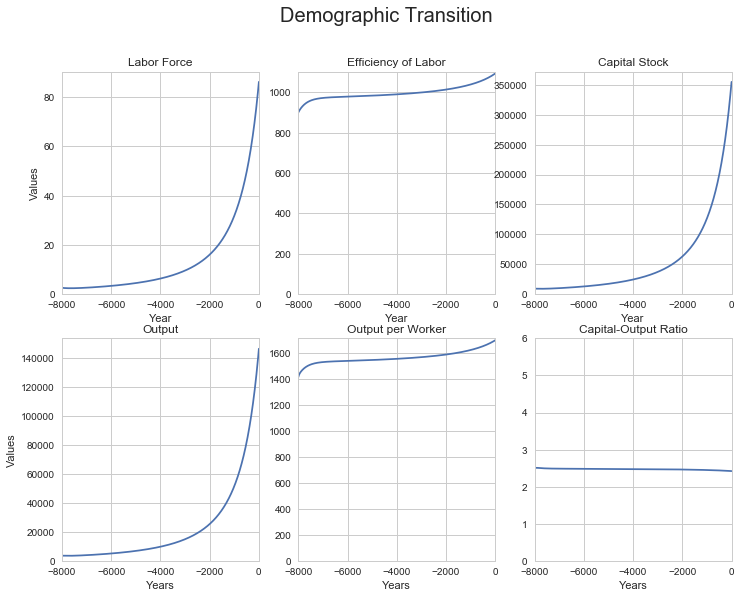

0.00125934506832 is the labor force growth rate
-9.366666666666666e-05 is the efficiency of labor growth rate
0.04 is the depreciation rate
0.1 is the savings rate
0.3333333333333333 is the decreasing-returns-to-scale parameter
 
86.2235627445 is the labor force in year 0
1701.31182448 is output per worker in year 0
 


In [27]:
sgm_malthus_run(T=801, figure_title = "Demographic Transition", 
    h=0.0000805, phi=0.01, ybar = 1500)

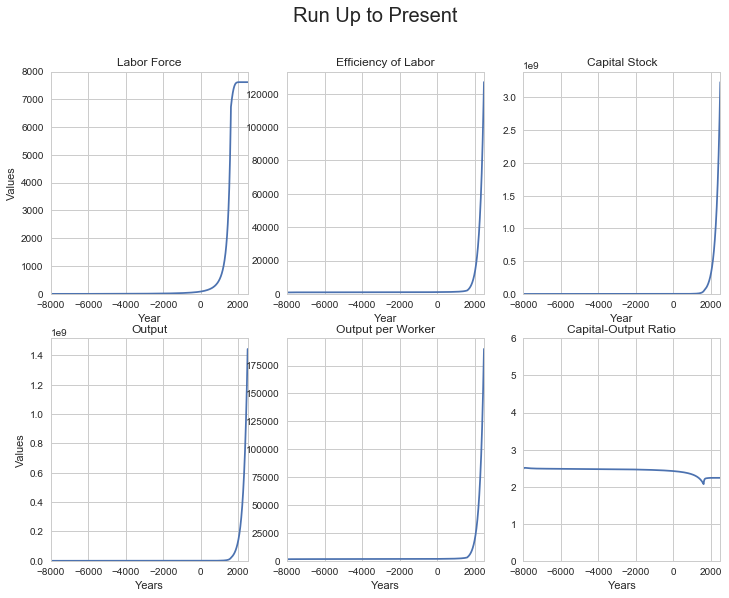

8.30129212731e-31 is the labor force growth rate
-9.366666666666666e-05 is the efficiency of labor growth rate
0.04 is the depreciation rate
0.1 is the savings rate
0.3333333333333333 is the decreasing-returns-to-scale parameter
 
86.2235627445 is the labor force in year 0
1701.31182448 is output per worker in year 0
 


In [31]:
sgm_malthus_run(T=1051, figure_title = "Run Up to Present", 
    h=0.0000805, phi=0.01, ybar = 1500)

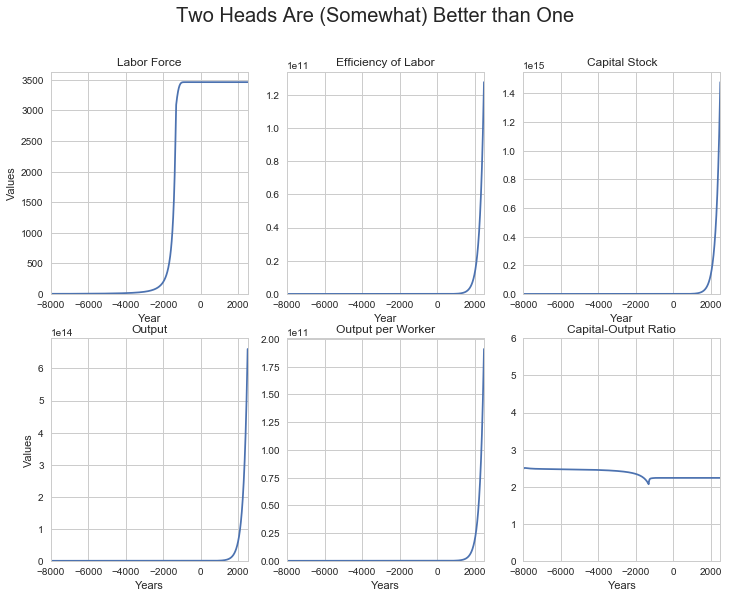

0.0 is the labor force growth rate
-6.733333333333333e-05 is the efficiency of labor growth rate
0.04 is the depreciation rate
0.1 is the savings rate
0.3333333333333333 is the decreasing-returns-to-scale parameter
 
3462.14325644 is the labor force in year 0
1478855.99619 is output per worker in year 0
 


In [32]:
sgm_malthus_run(T=1051, figure_title = "Two Heads Are (Somewhat) Better than One", 
    h=0.00012, phi=0.01, ybar = 1500)

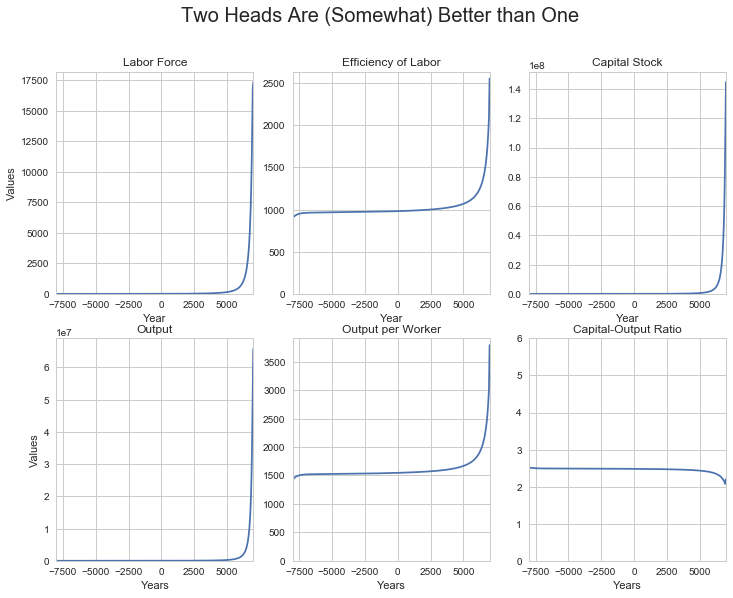

0.000720483298519 is the labor force growth rate
-0.00011399999999999999 is the efficiency of labor growth rate
0.04 is the depreciation rate
0.1 is the savings rate
0.3333333333333333 is the decreasing-returns-to-scale parameter
 
10.2662130154 is the labor force in year 0
1546.50539142 is output per worker in year 0
 


In [35]:
sgm_malthus_run(T=1501, figure_title = "Two Heads Are (Somewhat) Better than One", 
    h=0.00005, phi=0.01, ybar = 1500)

----

&nbsp;

In [36]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Submit... 100% complete
Submission successful for user: jbdelong@berkeley.edu
URL: https://okpy.org/cal/econ101b/sp18/PS6/submissions/oYKYRK

